In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Loading the data.
games = pd.read_csv("games.csv")
#games = games.sample(frac=0.1,random_state=1)

# Printing the names of colums
print("Features ::: ")
print(games.columns)
print("Shape : ",games.shape)

Features ::: 
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
Shape :  (81312, 20)


In [21]:
games.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [7]:
# Print the first row of all games with 0 scores.
print(games[games["average_rating"]==0].iloc[0])

# Print the first row of all games with >0 scores.
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [8]:
# Remove any rows without user reviews
games = games[games["users_rated"]>0]

In [10]:
#Remove any rows with missing values.
games = games.dropna(axis=0)

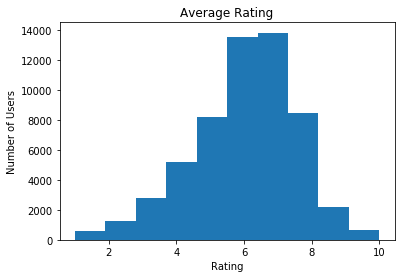

In [11]:
#Make histogram of all average ratings.
plt.hist(games['average_rating'])
plt.title("Average Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Users")
plt.show()

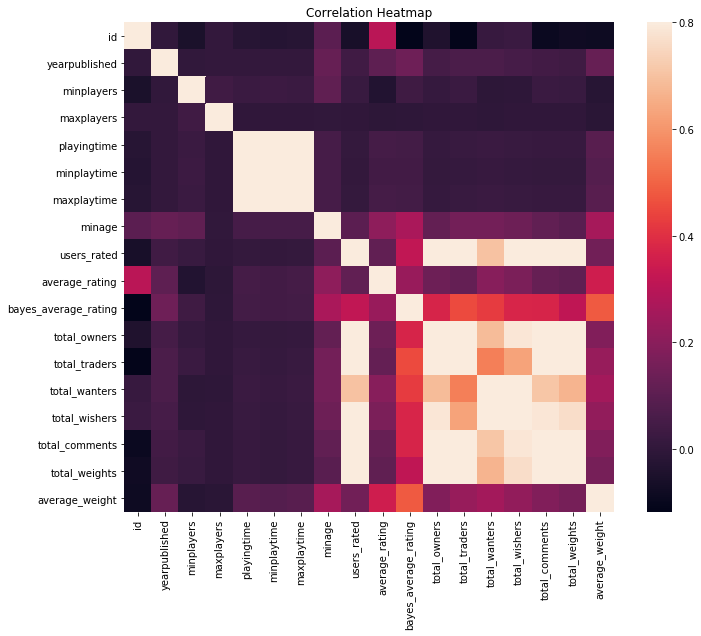

In [12]:
# Correlation metrics and heat map.
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Get all columns
columns = games.columns.tolist()

# Filter columns to remove data we do not want
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

#Store the variable we will be predicting on
target = "average_rating"


In [17]:
# Generate train and test dataset.
train = games.sample(frac=0.8,random_state=1)

# Select anything not in training state and put in test
test = games.loc[~games.index.isin(train.index)]


# Print Shape
print("Train Data Shape : ",train.shape)
print("Test Data Shape : ",test.shape)


Train Data Shape :  (45515, 20)
Test Data Shape :  (11379, 20)


In [18]:
#----------------Linear regression Model-------------#

print(end="\n")
print(end="\n")
print(end="\n")
print("Implementation of Linear Regression Model")
# Initialize the model class.
LR = LinearRegression()

# Fit the model training data
LR.fit(train[columns],train[target])

# Generate predictions for the test set
predictions = LR.predict(test[columns])

# Error between predictions and actual value
print("Mean Square Error of Predictions : ",mean_squared_error(predictions,test[target]))

#-----------------------------------------------------#




Implementation of Linear Regression Model
Mean Square Error of Predictions :  2.078819032629324


In [19]:
#----------------Random Forest regressor-------------#

print(end="\n")
print(end="\n")
print(end="\n")
print("Implementation of Random Forest Regressor")
# Initialize model
RFR = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

# Fit to the data
RFR.fit(train[columns],train[target])

# Make Predictions
predictions = RFR.predict(test[columns])

# Compute error of Predictions
print("Mean Square Error of Predictions : ",mean_squared_error(predictions,test[target]))

#----------------------------------------------------#




Implementation of Random Forest Regressor
Mean Square Error of Predictions :  1.4458560046071653


In [27]:
#-------------------Sample Prediction----------------#

print(end="\n")
print(end="\n")
print(end="\n")
print("Sample prediction for first game: ",games['name'][0])
# Making predictions with both models for first game
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

print("Actual Rating value of first game : ",test[target].iloc[0])
print("Rating value predicted by Linear Regression : ",rating_LR)
print("Rating value predicted by Random Forest Regressor : ",rating_RFR)

#----------------------------------------------------#




Sample prediction for first game:  Twilight Struggle
Actual Rating value of first game :  8.07933
Rating value predicted by Linear Regression :  [8.12061283]
Rating value predicted by Random Forest Regressor :  [7.91373581]
